# Time Series: Univariate

> **Disclaimer ⚠️:**
> - Demo ini sebatas referensi saja
> - Tidak boleh asal copy paste terutama pada bagian dengan tanda **[Additional ⚠️]** karna berpotensi terkena **PLAGIARISM**.

> Referensi Utama: https://www.dicoding.com/academies/185/tutorials/10174

## Kriteria dan Penilaian

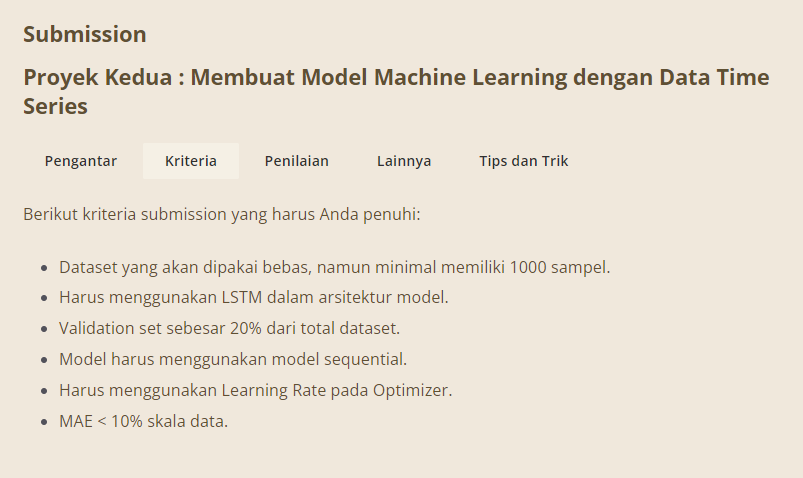
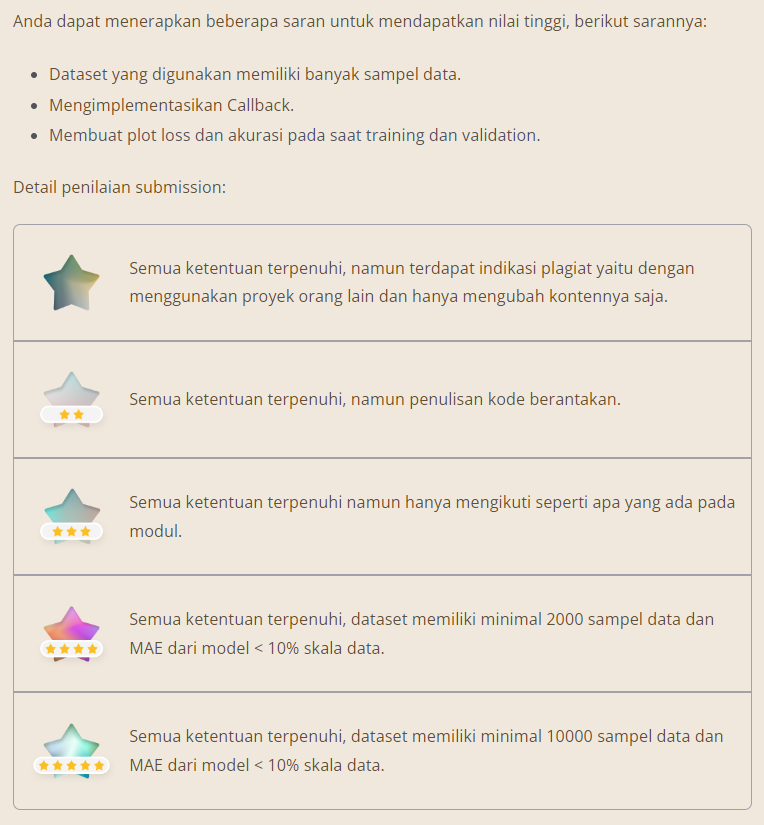

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

## Download Dataset

- Download: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
- Kemudian upload ke Google Colab

## Load Data

In [ ]:
data_train = pd.read_csv('DailyDelhiClimateTrain.csv')
data_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
data_test = pd.read_csv('DailyDelhiClimateTest.csv')
data_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


Bagaimana jika datanya belum displit dari bawaannya?

Jika dari bawaannya / sumber, dataset belum terpisah antara train dan test, maka kita perlu melakukan split. Untuk caranya akan dibahas di tahapan selanjutnya, stay tune!

## Explore the Data

Tujuan dari explore data adalah untuk mendapatkan gambaran / insight dari data yang digunakan yang dapat dimanfaatkan untuk improvement performa model nantinya.

### Check Nilai yang Hilang

In [ ]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

### Visualisasi Data

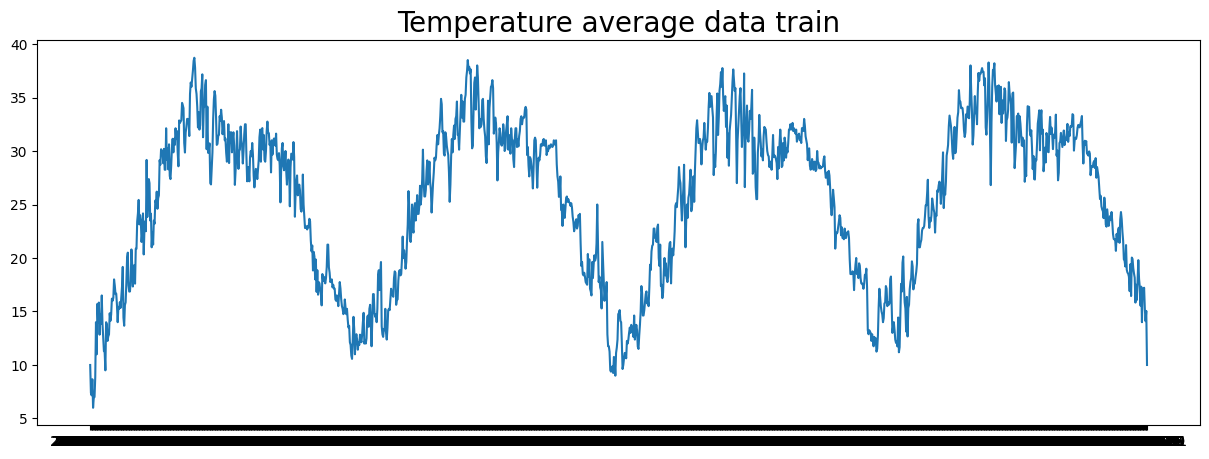

In [ ]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values


plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average data train',
          fontsize=20);

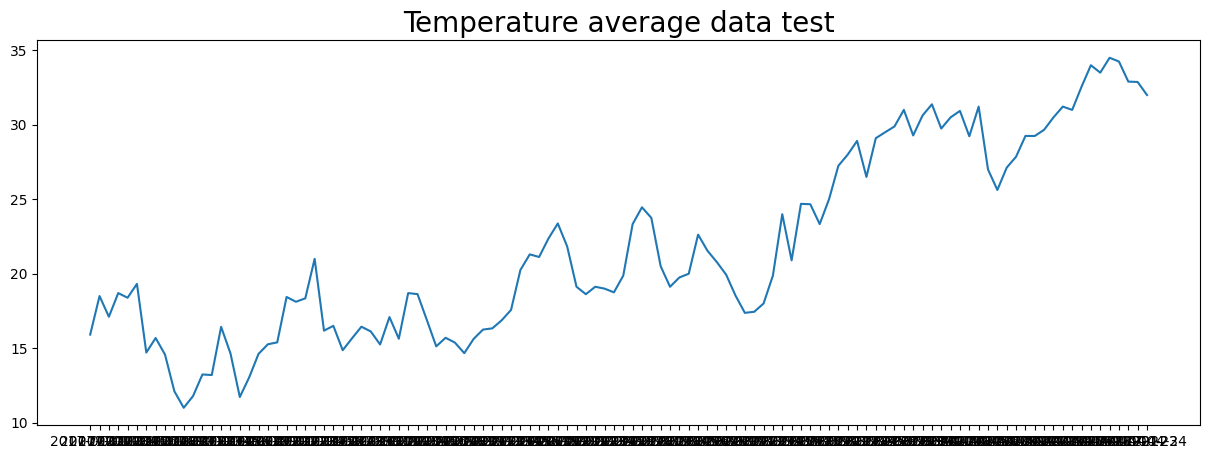

In [ ]:
dates = data_test['date'].values
temp  = data_test['meantemp'].values


plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average data test',
          fontsize=20);

### **[Additional ⚠️]** Visualization: Rolling Mean & Standard Deviation

Tujuan dari memvisualisasikan rolling mean & standard deviation erat hubungannya untuk meneliti apakah data stationary atau tidak.

#### Mean & Standard Deviation (Setiap 7 Hari)

In [ ]:
# Mengingat pada data ini, satuan waktunya harian maka window = 7 (hari).
# Data dilakukan windowed (dikotak-kotakan) setiap 7 hari.
# Lalu setiap window tersebut dihitung mean dan std nya
rolmean_7 = data_train['meantemp'].rolling(window=7).mean()
rolstd_7 = data_train['meantemp'].rolling(window=7).std()

In [ ]:
print("🔥🔥🔥 Rolling Mean @7Days")
print(rolmean_7[:10])
print("🔥🔥🔥 Rolling Standard Deviation @7Days")
print(rolstd_7[:10])

🔥🔥🔥 Rolling Mean @7Days
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    7.604762
7    7.441497
8    8.384354
9    8.931973
Name: meantemp, dtype: float64
🔥🔥🔥 Rolling Standard Deviation @7Days
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    1.316903
7    1.004166
8    2.672062
9    2.771856
Name: meantemp, dtype: float64


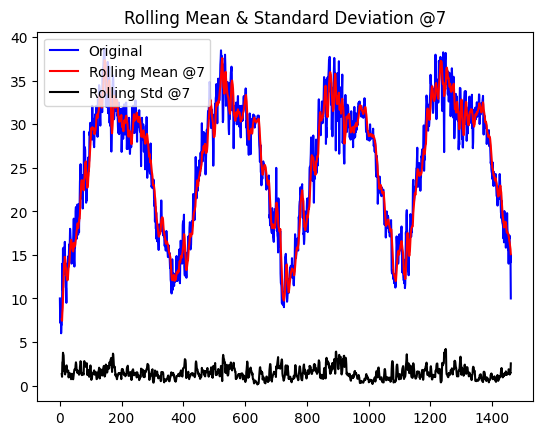

In [ ]:
#Plot rolling statistics
orig = plt.plot(data_train['meantemp'], color='blue', label='Original')
mean = plt.plot(rolmean_7, color='red', label='Rolling Mean @7')
std = plt.plot(rolstd_7, color='black', label='Rolling Std @7')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation @7')
plt.show(block=False)

#### Mean & Standard Deviation (Setiap 30 Hari)

In [ ]:
rolmean_30 = data_train['meantemp'].rolling(window=30).mean()
rolstd_30 = data_train['meantemp'].rolling(window=30).std()

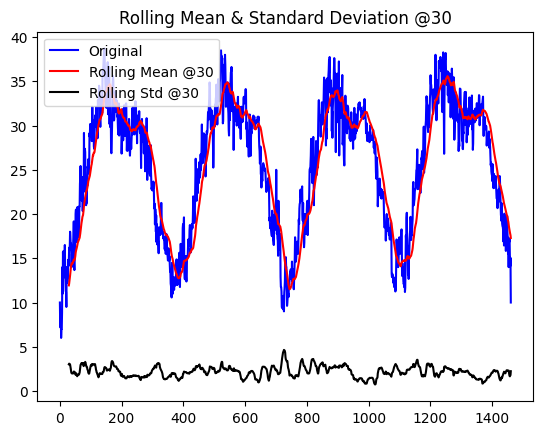

In [ ]:
#Plot rolling statistics
orig = plt.plot(data_train['meantemp'], color='blue', label='Original')
mean = plt.plot(rolmean_30, color='red', label='Rolling Mean @30')
std = plt.plot(rolstd_30, color='black', label='Rolling Std @30')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation @30')
plt.show(block=False)

#### Mean & Standard Deviation (Setiap 365 Hari)

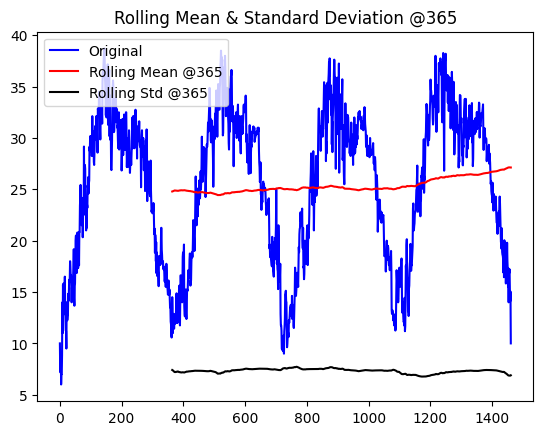

In [ ]:
rolmean_365 = data_train['meantemp'].rolling(window=365).mean()
rolstd_365 = data_train['meantemp'].rolling(window=365).std()

#Plot rolling statistics
orig = plt.plot(data_train['meantemp'], color='blue', label='Original')
mean = plt.plot(rolmean_365, color='red', label='Rolling Mean @365')
std = plt.plot(rolstd_365, color='black', label='Rolling Std @365')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation @365')
plt.show(block=False)

Terlihat bahwa pada data dengan selang 365 hari memiliki nilai rolling mean dan standard deviation yang cukup constant. Hal ini sesuai dengan sifat-sifat data stationary. Untuk mempertegas asumsi tersebut, kita dapat melakukan uji stationary pada tahap selanjutnya.

Catatan: Kalian bisa mencoba-coba untuk selang N-hari dengan melihat pola yang muncul, contoh pada data tersebut pola muncul setiap satu tahun (365 hari). Jika susah menemukan pola bisa langsung dengan uji secara statistik di bawah ini.

### **[Additional ⚠️]** Check Stationary

> Pada kasus (submission) yang mana menggunakan LSTM layer dalam model, maka pengecekan stationary tidak wajib, dikarenakan LSTM dapat bekerja pada data non-linear dan non-stationary.

Sumber: https://ieeexplore.ieee.org/document/8944624   
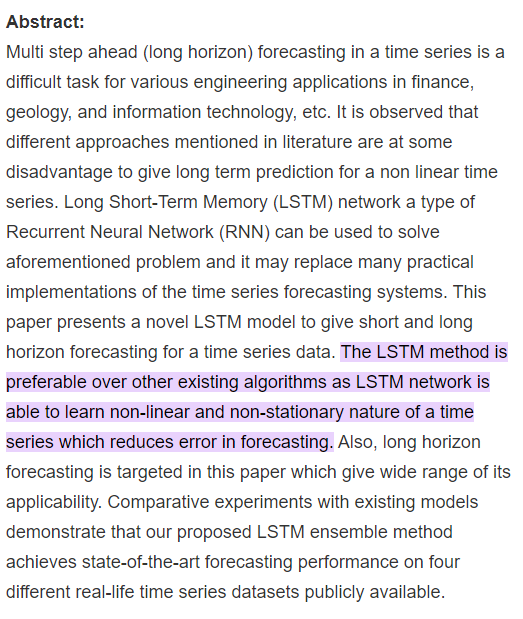  

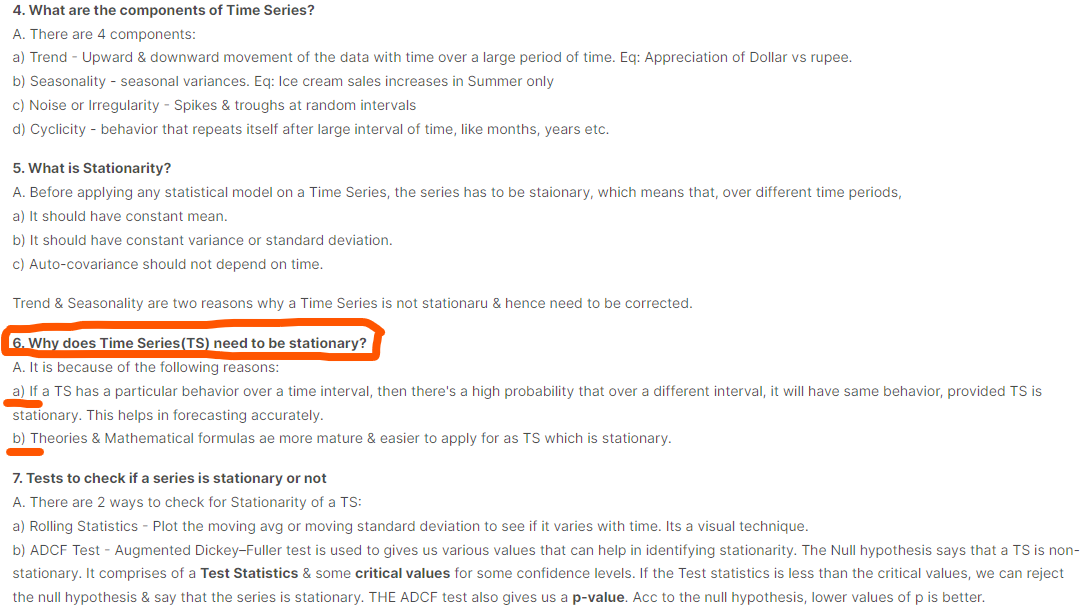

Referensi terkait stationary:
- https://www.kaggle.com/code/freespirit08/time-series-for-beginners-with-arima/notebook
- https://otexts.com/fpp2/stationarity.html
- https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b
- https://campus.datacamp.com/courses/forecasting-in-r/exploring-and-visualizing-time-series-in-r?ex=5#:~:text=The%20seasonality%20is%20seen%20by,the%20series%20rises%20and%20falls.
- https://stats.stackexchange.com/a/234601
- https://www.datalearns247.com/deteksi-stasioneritas-dalam-time-series-201

In [ ]:
from statsmodels.tsa.stattools import adfuller
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_train['meantemp'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -2.021069
p-value                           0.277412
#Lags Used                       10.000000
Number of Observations Used    1451.000000
Critical Value (1%)              -3.434865
Critical Value (5%)              -2.863534
Critical Value (10%)             -2.567832
dtype: float64


Time Series dikatakan stationary jika hasil uji Augmented Dickey-Fuller (ADCF) nya sebagai berikut:
1. p-value nya kecil (nilai max dari p-value adalah 1.0), semakin jauh dari nilai maxnya maka semakin bagus.
2. Nilai critical value 1%, 5%, dan 10% harus sedekat mungkin dengan nilai Test Statistics.

Berdasarkan hasil uji ADCF dan ketentuan di atas, kita dapati p-value cukup kecil dan nilai critical valuenya lebih kecil dan mendekati test statistic, maka aman untuk mengatakan bahwa **dataset tersebut stationary.**

Jika hasil pengujian tidak stationary, boleh dilakukan data transformation seperti `Log Scale Transformation` (check referensi kaggle untuk info lebih lanjut).

## **[Additional ⚠️]** Data Cleaning

Jika menemukan data yang null atau NaN dapat dihapus atau direplace dengan nilai tertentu (ref: https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e). Dalam hal ini kita akan menghapusnya.

```python
# Hapus baris dengan nilai null atau NaN
df = df.dropna(how='any',axis=0)
# Kita cek kembali
df.isna().sum()
```

## Preprocessing Data

In [ ]:
# Skip bagian ini jika belum melakukan split data
x_train = data_train['meantemp'].values
x_test = data_test['meantemp'].values
# Sample x_train
print("Sample x_train", x_train[:10])
print("Sample x_test", x_test[:10])

Sample x_train [10.          7.4         7.16666667  8.66666667  6.          7.
  7.          8.85714286 14.         11.        ]
Sample x_test [15.91304348 18.5        17.11111111 18.7        18.38888889 19.31818182
 14.70833333 15.68421053 14.57142857 12.11111111]


### Question: Lebih dahulu mana Normalisasi dengan Split Data?

### **[Additional ⚠️]** Split Data (Jika Data Belum Displit dari Sumbernya)

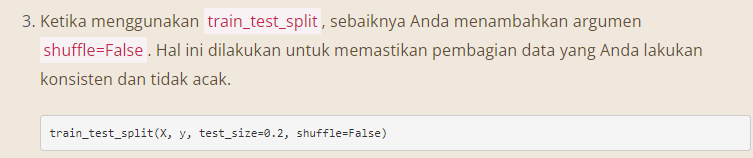

Cara lain:

```python
import math

series = data['meantmp'].values

# Train : Validation = 80 : 20
batas = math.ceil(0.8 * len(series))
x_train = series[:batas]
x_val = series[batas:]
```

### Normalisasi Data (Min Max Scaler)

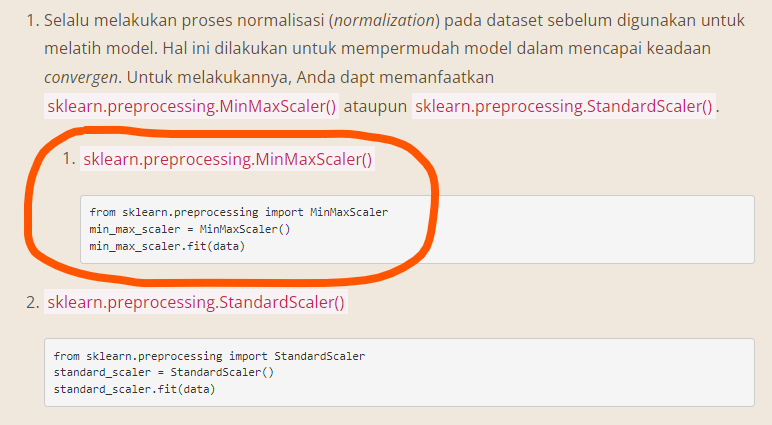

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
# Seperti halnya pada NLP kemarin, kita hanya fit pada train supaya tidak terjadi data leak (kebocoran data)
min_max_scaler.fit(np.array(x_train).reshape(-1, 1))

MinMaxScaler()

In [ ]:
x_train_with_minmaxscaler = min_max_scaler.transform(np.array(x_train).reshape(-1, 1))
x_test_with_minmaxscaler = min_max_scaler.transform(np.array(x_test).reshape(-1, 1))
print(x_train_with_minmaxscaler.squeeze())

[0.12227074 0.04279476 0.0356623  ... 0.24745269 0.276718   0.12227074]


Cara lain (relative lebih intuitive):

In [ ]:
# Tips: Menghindari data leak (kebocoran data antara train dan val)
# Kita lakukan normalisasi pada data train,
# kemudian dengan scaler (max dan min dari train) Kita lakukan normalisasi pada data val

min_train = np.min(x_train)
max_train = np.max(x_train)
x_train = x_train - min_train
x_train = x_train / max_train

x_test = x_test - min_train
x_test = x_test / max_train

# Sample x_train
print("Sample x_train", x_train[:10])
print("Sample x_test", x_test[:10])

Sample x_train [0.12227074 0.04279476 0.0356623  0.08151383 0.         0.03056769
 0.03056769 0.08733624 0.24454148 0.15283843]
Sample x_test [1.95519271 2.4654294  2.1914928  2.50487627 2.44351448 2.62680296
 1.71758248 1.91005899 1.69058016 1.20532104]


### Windowing Data

Contoh cara kerja windowing data

In [ ]:
n_step = 7
n_shift = 3
window_size = n_step + n_shift # window size
dataset = tf.data.Dataset.range(1, 100).window(window_size + 1, shift=n_shift, drop_remainder=True) # Drop / hapus sisanya (sehingga hanya berakhir di 97)
for i, window in enumerate(dataset):
  print("X =>", list(window.as_numpy_iterator())[:window_size], "y =>", list(window.as_numpy_iterator())[-1:])

X => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] y => [11]
X => [4, 5, 6, 7, 8, 9, 10, 11, 12, 13] y => [14]
X => [7, 8, 9, 10, 11, 12, 13, 14, 15, 16] y => [17]
X => [10, 11, 12, 13, 14, 15, 16, 17, 18, 19] y => [20]
X => [13, 14, 15, 16, 17, 18, 19, 20, 21, 22] y => [23]
X => [16, 17, 18, 19, 20, 21, 22, 23, 24, 25] y => [26]
X => [19, 20, 21, 22, 23, 24, 25, 26, 27, 28] y => [29]
X => [22, 23, 24, 25, 26, 27, 28, 29, 30, 31] y => [32]
X => [25, 26, 27, 28, 29, 30, 31, 32, 33, 34] y => [35]
X => [28, 29, 30, 31, 32, 33, 34, 35, 36, 37] y => [38]
X => [31, 32, 33, 34, 35, 36, 37, 38, 39, 40] y => [41]
X => [34, 35, 36, 37, 38, 39, 40, 41, 42, 43] y => [44]
X => [37, 38, 39, 40, 41, 42, 43, 44, 45, 46] y => [47]
X => [40, 41, 42, 43, 44, 45, 46, 47, 48, 49] y => [50]
X => [43, 44, 45, 46, 47, 48, 49, 50, 51, 52] y => [53]
X => [46, 47, 48, 49, 50, 51, 52, 53, 54, 55] y => [56]
X => [49, 50, 51, 52, 53, 54, 55, 56, 57, 58] y => [59]
X => [52, 53, 54, 55, 56, 57, 58, 59, 60, 61] y => [62]
X => [55, 

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    # +1 pada window_size untuk menambahkan label dari [X] menjadi [X, y] contoh X dan y bisa dilihat di atas.
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer) # Comment bagian ini untuk melihat pola yang dihasilkan dari windowed dataset
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1) # prefetch digunakan untuk optimalisasi proses batching

In [ ]:
# Dapat disesuaikan dengan hasil explorasi data sebelumnya
# Namun mengingat window_size harus sama antara train dan test (test = val dalam kasus ini)
# Jika window_sizenya tidak sesuai (terlalu besar) dengan data test
# Maka perlu disesuaikan lagi.
# window_size = 365 # (terlalu besar jika dikenakan pada data test yang hanya ada 4 bulan < 365 hari)
# Dari tutorial dicoding menggunakan:
window_size = 60

# Dapat disesuaikan dengan trial error
train_set = windowed_dataset(
    x_train,
    window_size=window_size,
    batch_size=64,
    shuffle_buffer=1000
)

val_set = windowed_dataset(
    x_test,
    window_size=window_size,
    batch_size=64,
    shuffle_buffer=1000
)

sample_batch1_train = list(train_set.take(1).as_numpy_iterator())
sample_pasangan_xy_train = sample_batch1_train[0][0][0], sample_batch1_train[0][1][0]
print("Sample ke-1 (X, y) pada batch ke-1 train_set", sample_pasangan_xy_train)


Sample ke-1 (X, y) pada batch ke-1 train_set (array([[0.80087336],
       [0.84443231],
       [0.79475983],
       [0.8069869 ],
       [0.90480349],
       [0.91266376],
       [0.95269287],
       [0.77292576],
       [0.8558952 ],
       [0.86200873],
       [0.92212518],
       [0.93613537],
       [0.73871907],
       [0.86026201],
       [0.72852984],
       [0.73799127],
       [0.75545852],
       [0.6419214 ],
       [0.63810044],
       [0.68471616],
       [0.72925764],
       [0.82532751],
       [0.88136827],
       [0.90480349],
       [0.8915575 ],
       [0.82969432],
       [0.7510917 ],
       [0.75400291],
       [0.77729258],
       [0.77947598],
       [0.83296943],
       [0.8202329 ],
       [0.85152838],
       [0.82969432],
       [0.78165939],
       [0.80622271],
       [0.81921397],
       [0.76419214],
       [0.76928675],
       [0.72852984],
       [0.70305677],
       [0.72598253],
       [0.81004367],
       [0.69923581],
       [0.7871179 ],
       [0

In [ ]:
sample_pasangan_xy_train = sample_batch1_train[0][0][1], sample_batch1_train[0][1][1]
print("Sample ke-2 (X, y) pada batch ke-1 train_set", sample_pasangan_xy_train)

Sample ke-2 (X, y) pada batch ke-1 train_set (array([[0.7871179 ],
       [0.75655022],
       [0.7871179 ],
       [0.72980349],
       [0.7680131 ],
       [0.7871179 ],
       [0.7489083 ],
       [0.63682678],
       [0.67860262],
       [0.71834061],
       [0.79039301],
       [0.72489083],
       [0.68267831],
       [0.73362445],
       [0.73799127],
       [0.80349345],
       [0.76419214],
       [0.7489083 ],
       [0.69796215],
       [0.73362445],
       [0.78165939],
       [0.81004367],
       [0.81004367],
       [0.71834061],
       [0.64701601],
       [0.68395197],
       [0.68777293],
       [0.64701601],
       [0.71615721],
       [0.73362445],
       [0.71834061],
       [0.75655022],
       [0.72343523],
       [0.66375546],
       [0.62969432],
       [0.65502183],
       [0.68267831],
       [0.6775837 ],
       [0.65338428],
       [0.68267831],
       [0.70815138],
       [0.77292576],
       [0.79475983],
       [0.70305677],
       [0.79475983],
       [0

Untuk melihat pola pada sample 1 dan 2 di atas, pastikan shufflenya dicomment dahulu, lalu cek label (y) pada sample 1 menjadi data terakhir X pada sample 2. Pola yang sama persis pada contoh windowing data di awal.

## Modelling

> Catatan:
> - Didalam deeplearning untuk menentukan banyak layer dan banyak unit (parameter dilayernya seperti 8, 16, dst) itu sifatnya trial and error. Tipsnya adalah memulai dengan jumlah layer dan unit yang kecil, lalu catat performa model dan lihat perubahan yang terjadi jika dilakukan perubahan banyak layer dan unit.
> - Mengimplementasikan callback.
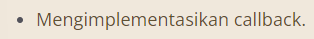
> - Jika terjadi overfitting, Anda dapat menambahkan Dropout layer untuk menanganinya.
 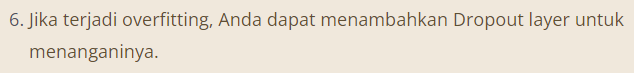

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60), # Coba dengan return_sequences=True atau False
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

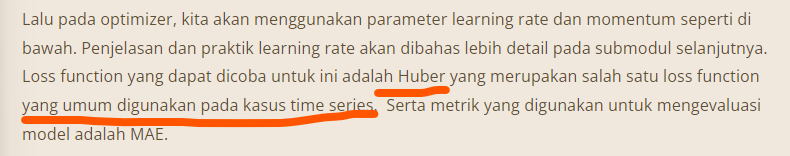

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
# Alternative optimizer yang dapat dicoba RMSprop
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

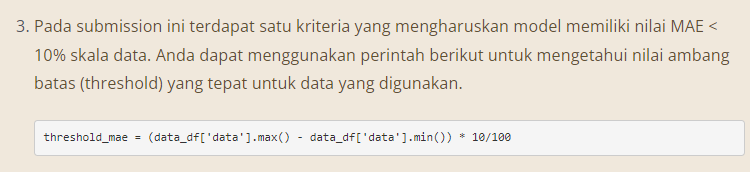

**Hati-hati**: jika pada tahap preprocessing data telah dilakukan normalisasi / standarisasi, maka nilai max dan min nya harus berdasarkan hasil normalisasi / standarisasi tersebut.

In [ ]:
threshold_mae = (np.max(x_train) - np.min(x_train)) * 10 / 100
print("Treshold MAE:", threshold_mae)

Treshold MAE: 0.1


Jika menggunakan normalisasi (min max scaler) maka harusnya didapat threshold_mae 0.1, karena maximalnya adalah 1 dan minimumnya 0 sehingga:
```
(1 - 0) * 10 / 100 = 0.1
```

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # Berhubung di Dicoding tidak menuliskan secara khusus apakah MAE untuk train atau val
    # Maka kita cukup pakai MAE dari train, namun jika kalian tertantang dengan tambahan MAE dari val itu lebih bagus!
    if logs.get('mae') < threshold_mae:
      print(f"\MAE dan Val MAE telah kurang dari batas 10% skala data ({threshold_mae})")
      self.model.stop_training = True

callback_mae = myCallback()

In [ ]:
callback_earlystopping = tf.keras.callbacks.EarlyStopping(monitor='mae', patience=5)

## Training Model

In [ ]:
history = model.fit(
    train_set,
    epochs=100,
    validation_data=val_set,
    callbacks=[callback_mae, callback_earlystopping],
    verbose=2
)

Epoch 1/100
22/22 - 8s - loss: 0.2144 - mae: 0.6160 - val_loss: 3.6572 - val_mae: 4.1572 - 8s/epoch - 360ms/step
Epoch 2/100
22/22 - 3s - loss: 0.1981 - mae: 0.5892 - val_loss: 3.6228 - val_mae: 4.1228 - 3s/epoch - 150ms/step
Epoch 3/100
22/22 - 2s - loss: 0.1815 - mae: 0.5609 - val_loss: 3.5901 - val_mae: 4.0901 - 2s/epoch - 94ms/step
Epoch 4/100
22/22 - 2s - loss: 0.1674 - mae: 0.5356 - val_loss: 3.5596 - val_mae: 4.0596 - 2s/epoch - 96ms/step
Epoch 5/100
22/22 - 2s - loss: 0.1538 - mae: 0.5107 - val_loss: 3.5315 - val_mae: 4.0315 - 2s/epoch - 94ms/step
Epoch 6/100
22/22 - 3s - loss: 0.1412 - mae: 0.4867 - val_loss: 3.5057 - val_mae: 4.0057 - 3s/epoch - 134ms/step
Epoch 7/100
22/22 - 2s - loss: 0.1317 - mae: 0.4679 - val_loss: 3.4811 - val_mae: 3.9811 - 2s/epoch - 95ms/step
Epoch 8/100
22/22 - 2s - loss: 0.1222 - mae: 0.4478 - val_loss: 3.4576 - val_mae: 3.9576 - 2s/epoch - 107ms/step
Epoch 9/100
22/22 - 3s - loss: 0.1134 - mae: 0.4287 - val_loss: 3.4351 - val_mae: 3.9351 - 3s/epoch 

Tampak masih overfitting, dimana jarak antara mae dan val_mae masih cukup jauh, kita bisa improve dengan mencoba tuning hyperparameter pada model dan pada saat preprocessing data (windowed_data).

Selain itu, hasil training belum menyentuh threshold_mae sehingga harus di tuning lagi.

## Visualisasi MAE dan Loss

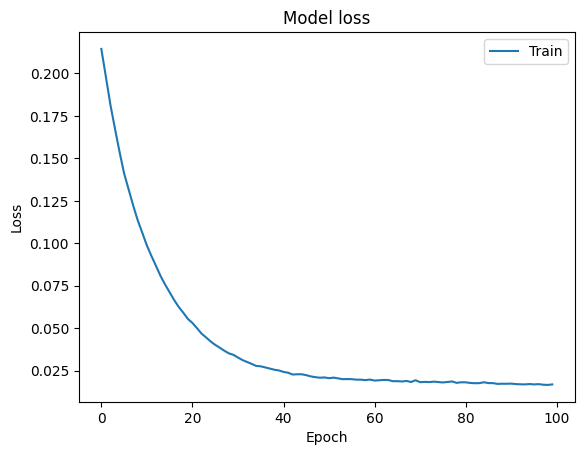

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

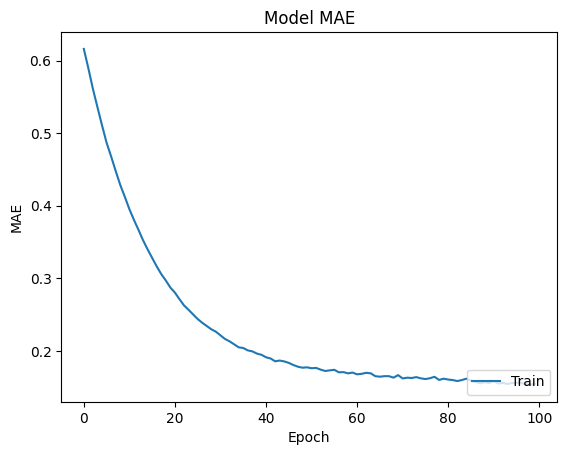

In [ ]:
plt.plot(history.history['mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

## Feel free untuk tanya / diskusi melalui grup atau japri fasil (Kak Galang) via WA ya 🙌